### Gradient Boosting Machines (GBM)
#### Amaç, hata kareler ortalamasını minimum yapacak katsayılar ya da karar kuralları bulmaktır.
##### AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uygulanabilen geliştirilmiş versiyonudur.
##### Hatalar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

#### Boosting Yöntemlerine Giriş
###### Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.
##### Adaptive Boosting (AdaBoost)
###### Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturma fikrini hayata geçiren algoritmadır.

#### Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
#### Seri içerisindeki bir model serideki bir önceki modelin tahmin hatalarının(residuals) üzerinde kurularak(fit) oluşturulur.
#### GBM, diferansitellenebilen herhangi bir kayıp fonksiyonu optimize edebilen Gradient Descent algoritmasını kullanmaktadır.
#### GB, bir çok temel öğrenici tipi(base learner type) kullanabilir. (Trees, linear terms, splines,..)
#### Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.
#### GBM = Boosting + Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

#### Model & Prediction

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
y_pred = gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test, y_pred))

353.126370958669

#### Model Tuning

###### criterion="friedman_mse" (Bölünmelerle ilgili saflık ölçüsünü ifade etmektedir.)
###### learning_rate=0.1 (Ağaçların katkısı ile ilgili göz önünde bulundurulan değerdir.)
###### loss="ls" (Kayıp fonksiyondur, ls ise en küçük karelerdir.)
###### max_depth=3 (Ağacın derinliğini ifade etmektedir.)
###### max_features=None (Göz önünde bulundurulacak değişken sayısını ifade etmektedir.)
###### max_leaf_nodes=None (Maksimum yaprak sayısını ifade etmektedir.)
###### n_estimators=100 (Kullanılacak olan ağaç sayısını ifade etmektedir.)
###### subsample=1.0 (Oluşturulacak olan ağaçları oluştururken göz önünde bulundurulacak olan oranı ifade etmektedir, 1 hepsi anlamına gelir.)

In [7]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100,200,500],
              "subsample": [1,0.5,0.8],
              "loss": ["ls", "lad", "quantile"]}

In [9]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [10]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [15]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.01,
                                      loss="lad",
                                      max_depth=3,
                                      n_estimators=500,
                                      subsample=0.5).fit(X_train, y_train)

In [16]:
y_pred = gbm_tuned.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

329.4997608800517

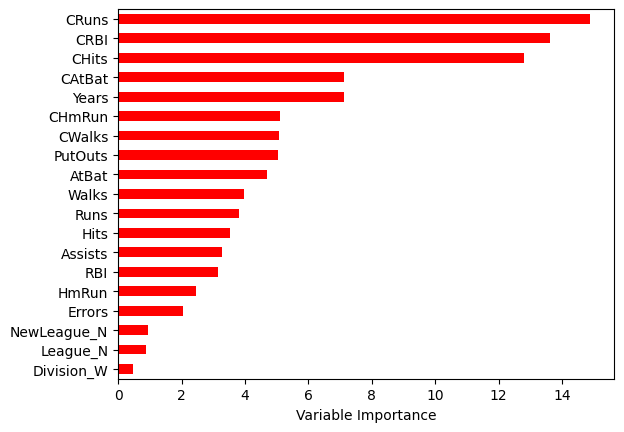

In [22]:
# Variable Importance Level
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = X_train.columns)
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None